In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
titanic = pd.read_csv("./data/titanic.csv")

In [3]:
titanic.describe()

# 나이, 성별
# 좌석 등급안에서 남과 여로 분류
# plcass안에서 찾아보기
# 출발지에 따라서 분류

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## 좌석 등급 안에서 성별에 따른 생존률

- 흔히 세간에 전해진 내용대로 나이와 성별에 따라 생존률이 갈릴 것으로 예상
- 좌석 등급, 부유한 정도에 따라서 생존률이 갈릴 것으로 예상해 좌석 등급 내에서 성별에 따른 생존률을 확인해 보기로 함
        
        
- 출발지에서는 어떤 유의미한 데이터가 있는지 확인해본다
        
        
- 여자의 생존률이 높다 -> 남자와 여자를 강제로 뽑아야 된다면 -> 여자를 살린다?
- 추가적으로 아이들이 있을 경우에는?

In [4]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
titanic['Age - 5'] = titanic.apply(lambda x: x['Age'] + x['SibSp'] if x['Parch'] == 0 else 'Parch is not 1', axis=1)

In [6]:
titanic['Parch'].dtypes

dtype('int64')

In [7]:
titanic.groupby(['Survived', 'Pclass']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass                                                            
0        1                80    80   80   64     80     80      80    80   
         2                97    97   97   90     97     97      97    97   
         3               372   372  372  270    372    372     372   372   
1        1               136   136  136  122    136    136     136   136   
         2                87    87   87   83     87     87      87    87   
         3               119   119  119   85    119    119     119   119   

                 Cabin  Embarked  Age - 5  
Survived Pclass                            
0        1          59        80       64  
         2           3        97       90  
         3           6       372      285  
1        1         117       134      123  
         2          13        87       83  
         3           6       119       89

In [8]:
def findFamilyName(name):
    temp = name.split(',')[0]
    return temp

titanic["FamilyName"] = titanic["Name"].apply(findFamilyName)

In [9]:
titanic[titanic['Name'].str.contains('van')].head()

PassengerId  Survived  Pclass                             Name     Sex  \
44            45         1       3    Devaney, Miss. Margaret Delia  female   
76            77         0       3                Staneff, Mr. Ivan    male   
153          154         0       3  van Billiard, Mr. Austin Blyler    male   
285          286         0       3              Stankovic, Mr. Ivan    male   
294          295         0       3                 Mineff, Mr. Ivan    male   

      Age  SibSp  Parch    Ticket     Fare Cabin Embarked         Age - 5  \
44   19.0      0      0    330958   7.8792   NaN        Q              19   
76    NaN      0      0    349208   7.8958   NaN        S             NaN   
153  40.5      0      2  A/5. 851  14.5000   NaN        S  Parch is not 1   
285  33.0      0      0    349239   8.6625   NaN        C              33   
294  24.0      0      0    349233   7.8958   NaN        S              24   

       FamilyName  
44        Devaney  
76        Staneff  
153  van Billiard  
285     Stankovic  
294        Mineff

In [10]:
titanic.groupby('FamilyName').agg(['mean', 'count']).columns

MultiIndex([('PassengerId',  'mean'),
            ('PassengerId', 'count'),
            (   'Survived',  'mean'),
            (   'Survived', 'count'),
            (     'Pclass',  'mean'),
            (     'Pclass', 'count'),
            (        'Age',  'mean'),
            (        'Age', 'count'),
            (      'SibSp',  'mean'),
            (      'SibSp', 'count'),
            (      'Parch',  'mean'),
            (      'Parch', 'count'),
            (       'Fare',  'mean'),
            (       'Fare', 'count')],
           )

In [11]:
a = [4, 7, 1]
a.sort()

In [12]:
a

[1, 4, 7]

In [13]:
titanic.drop(columns=['Ticket'])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch     Fare Cabin Embarked         Age - 5 FamilyName  
0        0   7.2500   NaN        S              23     Braund  
1        0  71.2833   C85        C              39    Cumings  
2        0   7.9250   NaN        S              26  Heikkinen  
3        0  53.1000  C123        S              36   Futrelle  
4        0   8.0500   NaN        S              35      Allen  
..     ...      ...   ...      ...             ...        ...  
886      0  13.0000   NaN        S              27   Montvila  
887      0  30.0000   B42        S              19     Graham  
888      2  23.4500   NaN        S  Parch is not 1   Johnston  
889      0  30.0000  C148        C              26       Behr  
890      0   7.7500   NaN        Q              32     Dooley  

[891 rows x 13 columns]

In [14]:
# 카빈에 몇명씩 있는지
titanic['newCabin'] = titanic['Cabin'].apply(lambda x: str(x)[0])
titanic.groupby(['Survived', 'newCabin'])['Name'].count()

Survived  newCabin
0         A             8
          B            12
          C            24
          D             8
          E             8
          F             5
          G             2
          T             1
          n           481
1         A             7
          B            35
          C            35
          D            25
          E            24
          F             8
          G             2
          n           206
Name: Name, dtype: int64

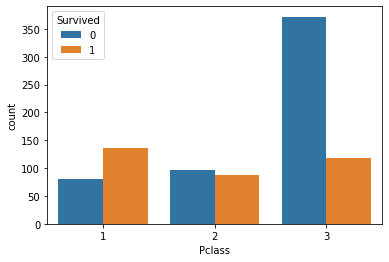

In [15]:
ax = sns.countplot(x='Pclass', hue="Survived", data=titanic)
plt.show()

In [16]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age - 5 FamilyName newCabin  
0      0         A/5 21171   7.2500   NaN        S      23     Braund        n  
1      0          PC 17599  71.2833   C85        C      39    Cumings        C  
2      0  STON/O2. 3101282   7.9250   NaN        S      26  Heikkinen        n  
3      0            113803  53.1000  C123        S      36   Futrelle        C  
4      0            373450   8.0500   NaN        S      35      Allen        n

# 성씨별로 살아남은사람 몇명인지

In [28]:
titanic['FamilyNumber'] = titanic['SibSp'] + titanic['Parch'] + 1

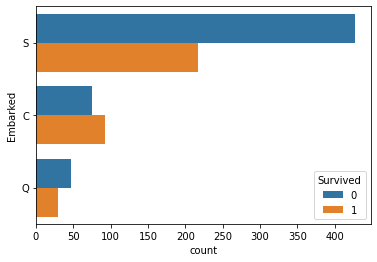

In [18]:
ax2 = sns.countplot(y='Embarked', hue='Survived', data=titanic)
plt.show()

In [21]:
titanic['FamilyName'] = titanic['Name'].apply(lambda x: x.split(',')[0])

In [23]:
titanic.FamilyName

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: FamilyName, Length: 891, dtype: object

In [25]:
titanic.groupby(['FamilyName'])['Survived'].count()

FamilyName
Abbing           1
Abbott           2
Abelson          2
Adahl            1
Adams            1
                ..
de Mulder        1
de Pelsmaeker    1
del Carlo        1
van Billiard     1
van Melkebeke    1
Name: Survived, Length: 667, dtype: int64

In [37]:
ax = titanic.loc[(titanic['FamilyNumber'] == 2) & (titanic['SibSp'] == 1) & (titanic['Pclass'] == 1)]
ax.sort_values(by = 'Cabin', ascending = False)

PassengerId  Survived  Pclass  \
809          810         1       1   
724          725         1       1   
370          371         1       1   
577          578         1       1   
434          435         0       1   
92            93         0       1   
275          276         1       1   
366          367         1       1   
215          216         1       1   
393          394         1       1   
52            53         1       1   
645          646         1       1   
748          749         0       1   
457          458         1       1   
496          497         1       1   
591          592         1       1   
621          622         1       1   
765          766         1       1   
486          487         1       1   
224          225         1       1   
453          454         1       1   
849          850         1       1   
544          545         0       1   
1              2         1       1   
62            63         0       1   
230          231         1       1   
412          413         1       1   
307          308         1       1   
505          506         0       1   
700          701         1       1   
741          742         0       1   
151          152         1       1   
336          337         0       1   
669          670         1       1   
712          713         1       1   
3              4         1       1   
137          138         0       1   
31            32         1       1   
671          672         0       1   
291          292         1       1   
484          485         1       1   
690          691         1       1   
781          782         1       1   
599          600         1       1   
556          557         1       1   
34            35         0       1   
35            36         0       1   
334          335         1       1   
375          376         1       1   
383          384         1       1   
513          514         1       1   

                                                  Name     Sex   Age  SibSp  \
809     Chambers, Mrs. Norman Campbell (Bertha Griggs)  female  33.0      1   
724                      Chambers, Mr. Norman Campbell    male  27.0      1   
370                        Harder, Mr. George Achilles    male  25.0      1   
577          Silvey, Mrs. William Baird (Alice Munger)  female  39.0      1   
434                          Silvey, Mr. William Baird    male  50.0      1   
92                         Chaffee, Mr. Herbert Fuller    male  46.0      1   
275                  Andrews, Miss. Kornelia Theodosia  female  63.0      1   
366   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  female  60.0      1   
215                            Newell, Miss. Madeleine  female  31.0      1   
393                             Newell, Miss. Marjorie  female  23.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
645                          Harper, Mr. Henry Sleeper    male  48.0      1   
748                          Marvin, Mr. Daniel Warner    male  19.0      1   
457                  Kenyon, Mrs. Frederick R (Marion)  female   NaN      1   
496                     Eustis, Miss. Elizabeth Mussey  female  54.0      1   
591    Stephenson, Mrs. Walter Bertram (Martha Eustis)  female  52.0      1   
621                       Kimball, Mr. Edwin Nelson Jr    male  42.0      1   
765               Hogeboom, Mrs. John C (Anna Andrews)  female  51.0      1   
486    Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)  female  35.0      1   
224                       Hoyt, Mr. Frederick Maxfield    male  38.0      1   
453                           Goldenberg, Mr. Samuel L    male  49.0      1   
849       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN      1   
544                         Douglas, Mr. Walter Donald    male  50.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
62                         Harris, Mr. Henry Birkhard

In [47]:
bx = titanic.loc[(titanic['FamilyNumber'] == 2) & (titanic['SibSp'] == 1) & (titanic['Pclass'] == 2)]
bx.sort_values(by = ['Embarked','FamilyName','Fare'], ascending = False)

PassengerId  Survived  Pclass  \
133          134         1       2   
41            42         0       2   
117          118         0       2   
476          477         0       2   
432          433         1       2   
99           100         0       2   
316          317         1       2   
217          218         0       2   
236          237         0       2   
861          862         0       2   
405          406         0       2   
53            54         1       2   
426          427         1       2   
594          595         0       2   
249          250         0       2   
854          855         0       2   
728          729         0       2   
543          544         1       2   
546          547         1       2   
518          519         1       2   
361          362         0       2   
9             10         1       2   
122          123         0       2   
866          867         1       2   
308          309         0       2   
874          875         1       2   

                                                  Name     Sex   Age  SibSp  \
133      Weisz, Mrs. Leopold (Mathilde Francoise Pede)  female  29.0      1   
41   Turpin, Mrs. William John Robert (Dorothy Ann ...  female  27.0      1   
117                    Turpin, Mr. William John Robert    male  29.0      1   
476                            Renouf, Mr. Peter Henry    male  34.0      1   
432  Louch, Mrs. Charles Alexander (Alice Adelaide ...  female  42.0      1   
99                                   Kantor, Mr. Sinai    male  34.0      1   
316                Kantor, Mrs. Sinai (Miriam Sternin)  female  24.0      1   
217                       Jacobsohn, Mr. Sidney Samuel    male  42.0      1   
236                                  Hold, Mr. Stephen    male  44.0      1   
861                        Giles, Mr. Frederick Edward    male  21.0      1   
405                                 Gale, Mr. Shadrach    male  34.0      1   
53   Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  female  29.0      1   
426        Clarke, Mrs. Charles V (Ada Maria Winfield)  female  28.0      1   
594                            Chapman, Mr. John Henry    male  37.0      1   
249                      Carter, Rev. Ernest Courtenay    male  54.0      1   
854      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0      1   
728                    Bryhl, Mr. Kurt Arnold Gottfrid    male  25.0      1   
543                                  Beane, Mr. Edward    male  32.0      1   
546                  Beane, Mrs. Edward (Ethel Clarke)  female  19.0      1   
518  Angle, Mrs. William A (Florence "Mary" Agnes H...  female  36.0      1   
361                          del Carlo, Mr. Sebastiano    male  29.0      1   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
122                               Nasser, Mr. Nicholas    male  32.5      1   
866                       Duran y More, Miss. Asuncion  female  27.0      1   
308                                Abelson, Mr. Samuel    male  30.0      1   
874              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0      1   

     Parch         Ticket     Fare Cabin Embarked Age - 5    FamilyName  \
133      0         228414  26.0000   NaN        S      30         Weisz   
41       0          11668  21.0000   NaN        S      28        Turpin   
117      0          11668  21.0000   NaN        S      30        Turpin   
476      0          31027  21.0000   NaN        S      35        Renouf   
432      0     SC/AH 3085  26.0000   NaN        S      43         Louch   
99       0         244367  26.0000   NaN        S      35        Kantor   
316      0         244367  26.0000   NaN        S      25        Kantor   
217      0         243847  27.0000   NaN        S      43     Jacobsohn   
236      0          26707  26.0000   NaN        S      45          Hold   
861      0          28134  11.5000   NaN        S      22         Giles   
405      0         

In [44]:
cx = titanic.loc[(titanic['FamilyNumber'] == 2) & (titanic['SibSp'] == 1) & (titanic['Pclass'] == 3)]
cx.sort_values(by = ['Embarked','FamilyName'], ascending = False)

PassengerId  Survived  Pclass  \
559          560         1       3   
371          372         0       3   
18            19         0       3   
431          432         1       3   
639          640         0       3   
132          133         0       3   
442          443         0       3   
267          268         1       3   
743          744         0       3   
253          254         0       3   
617          618         0       3   
664          665         1       3   
605          606         0       3   
113          114         0       3   
402          403         0       3   
721          722         0       3   
729          730         0       3   
704          705         0       3   
142          143         1       3   
403          404         0       3   
451          452         0       3   
490          491         0       3   
347          348         1       3   
0              1         0       3   
477          478         0       3   
206          207         0       3   
49            50         0       3   
353          354         0       3   
192          193         1       3   
40            41         0       3   
186          187         1       3   
364          365         0       3   
241          242         1       3   
612          613         1       3   
109          110         1       3   
768          769         0       3   
46            47         0       3   
214          215         0       3   
111          112         0       3   
240          241         0       3   
620          621         0       3   
830          831         1       3   
39            40         1       3   
125          126         1       3   
73            74         0       3   
578          579         0       3   

                                                  Name     Sex   Age  SibSp  \
559       de Messemaeker, Mrs. Guillaume Joseph (Emma)  female  36.0      1   
371                          Wiklund, Mr. Jakob Alfred    male  18.0      1   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
431  Thorneycroft, Mrs. Percival (Florence Kate White)  female   NaN      1   
639                         Thorneycroft, Mr. Percival    male   NaN      1   
132     Robins, Mrs. Alexander A (Grace Charity Laury)  female  47.0      1   
442                          Petterson, Mr. Johan Emil    male  25.0      1   
267                           Persson, Mr. Ernst Ulrik    male  25.0      1   
743                                  McNamee, Mr. Neal    male  24.0      1   
253                           Lobb, Mr. William Arthur    male  30.0      1   
617    Lobb, Mrs. William Arthur (Cordelia K Stanlick)  female  26.0      1   
664                        Lindqvist, Mr. Eino William    male  20.0      1   
605                      Lindell, Mr. Edvard Bengtsson    male  36.0      1   
113                            Jussila, Miss. Katriina  female  20.0      1   
402                           Jussila, Miss. Mari Aina  female  21.0      1   
721                          Jensen, Mr. Svend Lauritz    male  17.0      1   
729                      Ilmakangas, Miss. Pieta Sofia  female  25.0      1   
704                            Hansen, Mr. Henrik Juul    male  26.0      1   
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
403                     Hakkarainen, Mr. Pekka Pietari    male  28.0      1   
451                    Hagland, Mr. Ingvald Olai Olsen    male   NaN      1   
490               Hagland, Mr. Konrad Mathias Reiersen    male   NaN      1   
347          Davison, Mrs. Thomas Henry (Mary E Finck)  female   NaN      1   
0                              Braund, Mr. Owen Harris    male  22.0      1   
477                          Braund, Mr. Lewis Richard    male  29.0      1   
206                         Backstrom, Mr. Karl Alfred    male  32.0      1   
49       Arnold-Franchi, Mrs. Josef (Josefine Franchi)  female  18.0      1   
353   

In [41]:
ax.shape + bx.shape + cx.shape

(51, 17, 26, 17, 46, 17)